# ENPM673 Project 2

By: Sachin Jadhav (119484524)

In [ ]:
# Connect to drive and change to required
# ENSURE YOU GIVE ALL THE PERMISSIONS WHILE CONNECTIONG
# YOUR GOOGLE DRIVE USING THS COMMAND
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# Change the working directory
path_to_folder = "ENPM673/tutorials"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673/tutorials


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

### Reading Video

In [ ]:
%ls

 assets/                                OpenCV_basics_ENPM673.ipynb
'Copy of ENPM673_Project1.ipynb'        OpenCV_Video_Tutorial.ipynb
 ENPM673_Project1.ipynb                 processed_output_video.mp4
 Introduction_to_Python_ENPM673.ipynb


# Skipping blurry frames with variance of laplacian > 150

In [ ]:
# Read a video
video_capture = cv2.VideoCapture('assets/proj2_v2.mp4')

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('non_blurry_output_video.mp4', fourcc, 30, (frame_width, frame_height))

# Initializing variables to get the total frame count and the filtered frame count
total_frame_count = 0
sharp_frame_count = 0

# Capturing each frame and converting it to Grayscale
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    #Using Laplacian 3x3 Kernel
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])

    # Apply the Laplacian operator
    laplacian = cv2.filter2D(frame, -1, laplacian_kernel)

    # # Compute the variance of the Laplacian
    laplacian_variance = cv2.meanStdDev(laplacian)[1]**2

    # Computing to get the total frames
    total_frame_count += 1

    for variance in laplacian_variance:
        if variance > 120:
            # Computing to get the sharp frames
            sharp_frame_count += 1
            # Writes the processed frame to the output video
            out.write(frame)
        # print(laplacian_variance)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# The Total Frame count is
print("The Total Frame Count: ", total_frame_count)
print("No. of Sharp frames obtained are: ", sharp_frame_count)

# Close VideoWriter object
out.release()

# Close OpenCV windows
cv2.destroyAllWindows()


The Total Frame Count:  386
No. of Sharp frames obtained are:  183


# Edge Detection using Canny Edge Detector

183


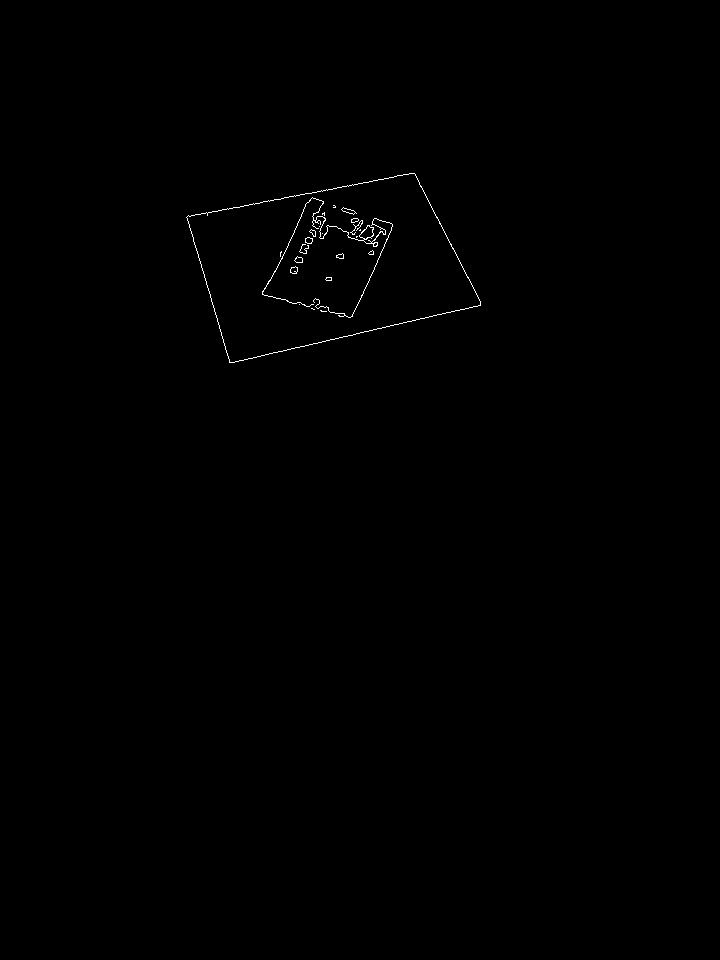

In [ ]:
from IPython.display import clear_output
# Read a video
video_capture2 = cv2.VideoCapture('non_blurry_output_video.mp4')

# Get video properties
frame_width = int(video_capture2.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture2.get(cv2.CAP_PROP_FPS))

frame_count = 0
canny_frames = []
# Capturing each frame and converting it to Grayscale
while True:
    ret, frame = video_capture2.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # non_zero = np.nonzero(binary_mask)
    non_zero_pixels = np.where(gray_frame > 200)

    # Create an image with only non-zero pixels
    non_zero_frame = np.zeros_like(frame)
    non_zero_frame[non_zero_pixels] = frame[non_zero_pixels]

    # Apply Morphological Operations (Erosion and Dilation) Opening and Closing Operations
    kernel = np.ones((3, 3), np.uint8)
    eroded = cv2.erode(non_zero_frame, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    '''
    Canny edge detection:
        The Canny edge detector is used to detect edges in images based on intensity gradients.
        It operates by applying Gaussian smoothing to reduce noise, computing gradient magnitude and direction,
        performing non-maximum suppression to thin edges, and finally applying hysteresis thresholding to detect strong and weak edges.
              - dilated: The input image on which edge detection is performed.
              - threshold1: The lower threshold for the hysteresis procedure. It is used to detect weak edges.
              - threshold2: The upper threshold for the hysteresis procedure. It is used to detect strong edges.
    '''
    edges = cv2.Canny(dilated, threshold1=50, threshold2=100)

    frame_count += 1
    print(frame_count)
    cv2_imshow(edges)
    canny_frames.append(edges)
    clear_output(True)



# Obtaining Intersection points using Hough Lines Algorithm

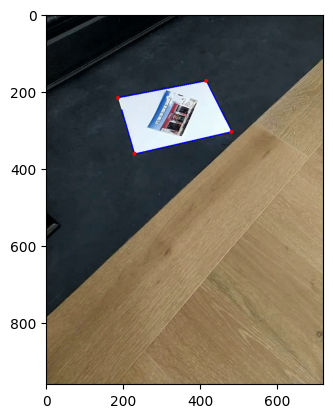

In [ ]:
from IPython.display import clear_output
# Read a video
video_capture2 = cv2.VideoCapture('clear_output_video.mp4')

# Get video properties
frame_width = int(video_capture2.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture2.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out3 = cv2.VideoWriter('houghline_output_video.mp4', fourcc, 30, (frame_width, frame_height))

# Capturing each frame and converting it to Grayscale
for edges in canny_frames:
      ret, frame = video_capture2.read()
      if not ret:
          break

            # Array to capture the lines in each frame if not obtained earlier
      line_array = []

      '''
      In the hough space, d is the perpendicular distance of the line from the origin, the max d will be the
      hypotenuse of the rectangle of the detected binary image.
      The hough transform algorithm is iterated through all the edge pixels, when edge pixel is not equal zero in
      the binary image.
      '''
      lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=13, minLineLength=87, maxLineGap=5)

      # Draw detected lines on the frame
      if lines is not None:
          for line in lines:
              x1, y1, x2, y2 = line[0]
              cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
              slope = (y2 - y1) / (x2 - x1)
              intercept = (y1 - slope * x1)
              line_array.append((intercept, slope))

      '''
      After obtaining the lines in the line_array, this block of code goes through all the points of line obtained in the Hough Line P algorithm and checks if each
      consecutive line intersects with the other for its obtained slope and intercept.
      '''
      intersections = []
      for i in range (len(line_array)):
              j = i + 1
              c1 , m1 = line_array[i]
              while(j < len(line_array)):
                  c2 , m2 = line_array[j]
                  if (m1 != m2):
                      # print('for one line')
                      x = int((c2 - c1) / (m1 - m2))
                      y = int(m1 * x + c1)
                      intersections.append((x , y))
                      center = (x , y)
                      cv2.circle(frame, center, 5, (0, 0, 255), -1)
                  j = j +  1

      # Display the original image and the one with corners
      plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
      plt.show()
      # Writes the processed frame to the output video
      out3.write(frame)

      # Clear the output cell to update the frame
      clear_output(wait=True)

      if cv2.waitKey(25) & 0xFF == ord('q'):
          break
# Close VideoWriter object
out3.release()

# Close OpenCV windows
cv2.destroyAllWindows()

# Corner Detection using Harris Corner Detector

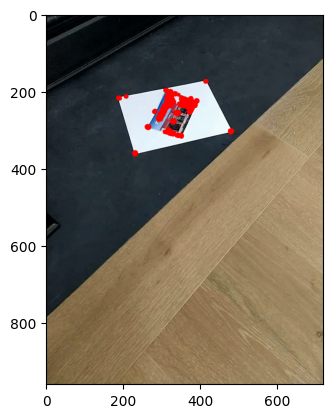

In [ ]:
from IPython.display import clear_output
# Read a video
video_capture2 = cv2.VideoCapture('non_blurry_output_video.mp4')

# Get video properties
frame_width = int(video_capture2.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture2.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out2 = cv2.VideoWriter('harris_corner_output_video.mp4', fourcc, 30, (frame_width, frame_height))

# Capturing each frame and converting it to Grayscale
for edges in canny_frames:
      ret, frame = video_capture2.read()
      if not ret:
          break

      '''
      The Harris corner detector is used to identify corners in images based on variations in intensity.
      It operates by computing a corner response function at each pixel, indicating the likelihood of a corner.
      Here's an explanation of the parameters:
      - edges: The input image where corners are to be detected.
      - blockSize: The size of the neighborhood considered for corner detection. It defines the size of the region for which the Harris corner response is calculated.
      - ksize: Aperture parameter for the Sobel operator. It determines the size of the Sobel kernel used to compute the image derivatives.
      - k: Harris detector free parameter. It is a constant factor multiplied with the trace of the covariance matrix of derivatives.
      '''
      dst = cv2.cornerHarris(edges, blockSize=7, ksize=5, k=0.04)

      # Threshold for an optimal value, it may vary depending on the image.
      threshold = 0.17 * dst.max()

      # Create an image copy to draw corners on
      corner_image = np.copy(frame)

      # Draw corners on the image
      corner_image[dst > threshold] = [0, 0, 255]  # Red color for detected corners

      harris_corner_points = []

      # Draw circles around detected corners for better visibility
      radius = 5  # Adjust the radius for the size of the corner points
      for i in range(dst.shape[0]):
          for j in range(dst.shape[1]):
              if dst[i, j] > threshold:
                  cv2.circle(corner_image, (j, i), radius, (0, 0, 255), -1)  # Red color for detected corners
                  harris_corner_points.append((j, i))


      # To Display the Harris corner image comment this out
      plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
      plt.show()
      # Clear the output cell to update the frame
      clear_output(wait=True)

      if cv2.waitKey(25) & 0xFF == ord('q'):
          break

# Close OpenCV windows
cv2.destroyAllWindows()

# Eradicating Extraneous Points by comparing Hough Line intersections with Harris Corners

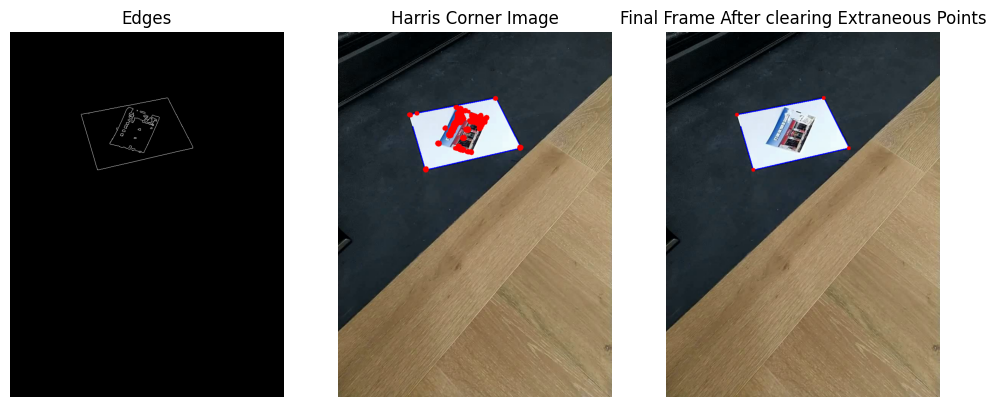

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Read a video
video_capture2 = cv2.VideoCapture('non_blurry_output_video.mp4')

# Get video properties
frame_width = int(video_capture2.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture2.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out2 = cv2.VideoWriter('final_output_video.mp4', fourcc, 30, (frame_width, frame_height))

# Capturing each frame and converting it to Grayscale
for edges in canny_frames:
    ret, frame = video_capture2.read()
    if not ret:
        break

    # Array to capture the lines in each frame if not obtained earlier
    line_array = []

    # Perform Hough line detection
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=13, minLineLength=87, maxLineGap=5)

    # Draw detected lines on the frame
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            slope = (y2 - y1) / (x2 - x1)
            intercept = (y1 - slope * x1)
            line_array.append((intercept, slope))

    '''
    After obtaining the lines in the line_array, this block of code goes through all the points of line obtained in the Hough Line P algorithm and checks if each
    consecutive line intersects with the other for its obtained slope and intercept.
    '''
    intersections = []
    for i in range (len(line_array)):
            j = i + 1
            c1 , m1 = line_array[i]
            while(j < len(line_array)):
                c2 , m2 = line_array[j]
                if (m1 != m2):
                    # print('for one line')
                    x = int((c2 - c1) / (m1 - m2))
                    y = int(m1 * x + c1)
                    intersections.append((x , y))
                    center = (x , y)
                    # cv2.circle(frame, center, 5, (255, 0, 0), -1)
                j = j +  1

    # Perform Harris corner detection
    dst = cv2.cornerHarris(edges, blockSize=7, ksize=5, k=0.04)

    # Threshold for an optimal value, it may vary depending on the image.
    threshold = 0.17 * dst.max()

    # Create an image copy to draw corners on
    corner_image = np.copy(frame)

    # Draw corners on the image
    corner_image[dst > threshold] = [0, 0, 255]  # Red color for detected corners

    harris_corner_points = []

    # Draw circles around detected corners for better visibility
    radius = 5  # Adjust the radius for the size of the corner points
    for i in range(dst.shape[0]):
        for j in range(dst.shape[1]):
            if dst[i, j] > threshold:
                cv2.circle(corner_image, (j, i), radius, (0, 0, 255), -1)  # Red color for detected corners
                harris_corner_points.append((j, i))

    # To detect if the point is in both harris_corner_points and intersections list we check if the harris_corner_point
    # is in a small distance from the intersection point
    for i in range(len(harris_corner_points)):
          for j in range(len(intersections)):
                distance = np.sqrt((harris_corner_points[i][0] - intersections[j][0])**2 + (harris_corner_points[i][1] - intersections[j][1])**2)
                if distance <= 5:
                          cv2.circle(frame, (intersections[j][0], intersections[j][1]), 5, (0, 0, 255), -1)


    # Shows the frames side by side
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Edges')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Harris Corner Image')
    axes[1].axis('off')
    axes[2].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Final Frame After clearing Extraneous Points')
    axes[2].axis('off')
    plt.show()
    clear_output(wait=True)

    # Write the frame to the output video
    out2.write(frame)

# Close VideoWriter object
out2.release()

# Close OpenCV windows
cv2.destroyAllWindows()


# Displaying the video

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

# Play this after capturing the video in the block below
# Function to display the video
def display_video(video):
    fig = plt.figure(figsize=(3,3))

    mov = []
    for i in range(len(video)):
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)
    plt.close()

    return anime

# Load video
video = imageio.mimread('final_output_video.mp4', memtest=False)


# Inline video display in HTML5
HTML(display_video(video).to_html5_video())

# Question 2
Image Stitching

Step1: Feature Detection

Step2: Homography Calculation

Step3: Image Blending


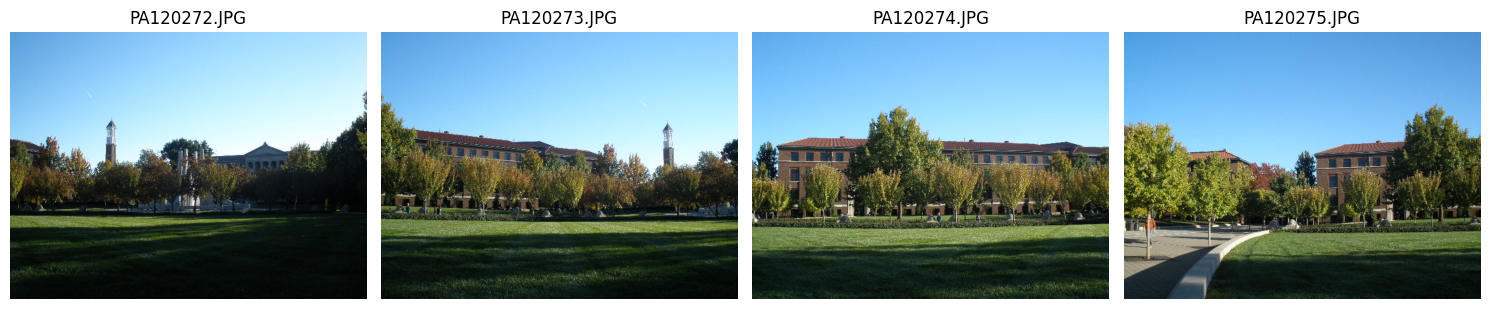

In [ ]:
import matplotlib.pyplot as plt
import cv2

# List of image paths
image_paths = ['PA120272.JPG', 'PA120273.JPG', 'PA120274.JPG', 'PA120275.JPG']

# Set up the figure and axis for plotting
num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Iterate over each image path and plot it
for idx, image_path in enumerate(image_paths):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image using plt.imshow()
    axes[idx].imshow(image_rgb)
    axes[idx].set_title(image_path)  # Set the title as the image path
    axes[idx].axis('off')  # Turn off axis

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Obtain the matches using KDTree and FLANN Matcher

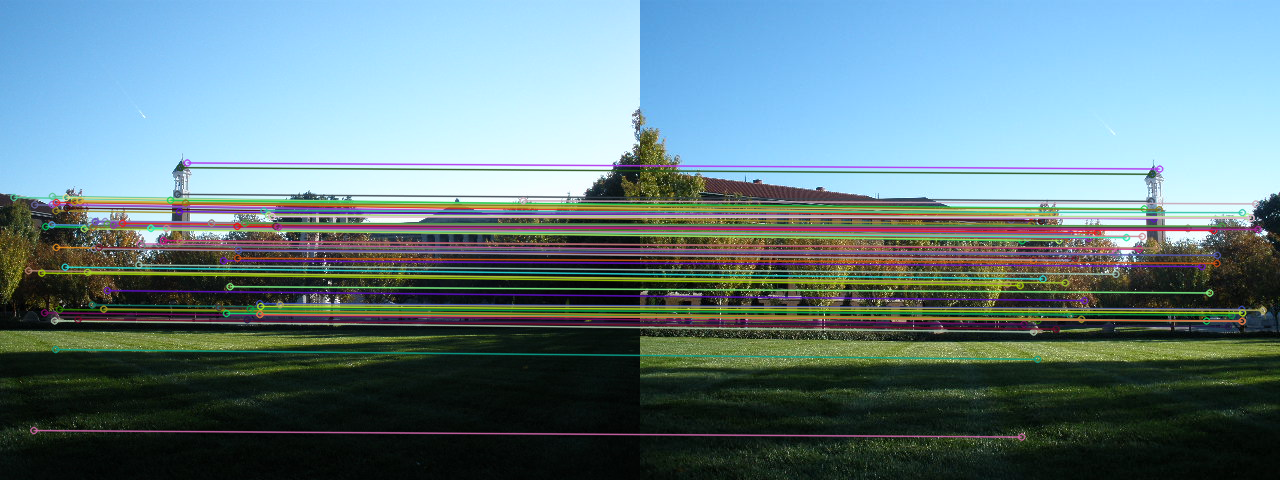

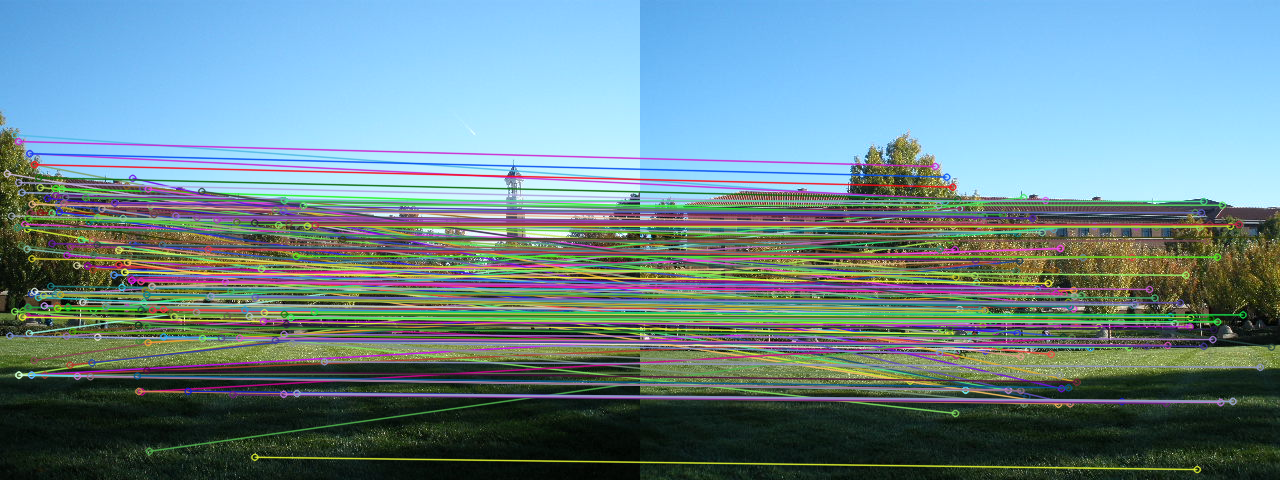

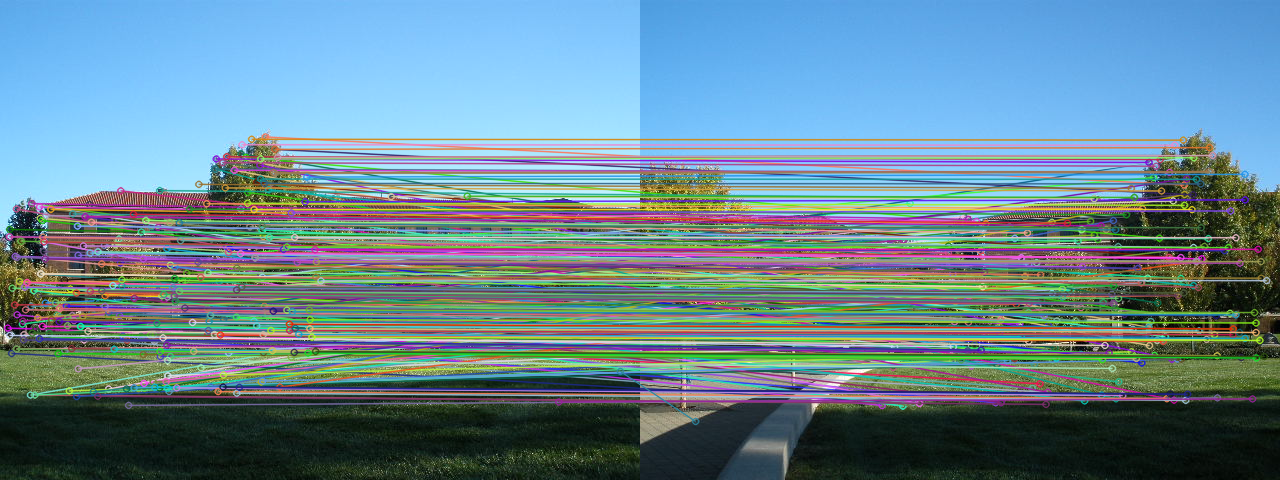

In [87]:
# Stored all the images in a list
image_paths = ['PA120272.JPG', 'PA120273.JPG', 'PA120274.JPG', 'PA120275.JPG']  # Update with your image paths

# Loaded all the images
image_paths = [cv2.imread(image_path) for image_path in image_paths]

# Ratio test to select good matches
good_matches = []

# Image Stitcher Function to stitch any two images on a canvas
# Here Image1 is the source image and image
def matcher(image1, image2):
      # Create SIFT detector
      sift = cv2.SIFT_create()

      # FLANN parameters
      FLANN_INDEX_KDTREE = 1
      index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=2)
      search_params = dict(checks=10)

      # Matcher
      flann = cv2.FlannBasedMatcher(index_params, search_params)

      # Convert images to grayscale
      gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
      gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

      # Detect keypoints and compute descriptors for both images
      keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
      keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

      # Matches descriptors using FLANN matcher
      matches = flann.knnMatch(descriptors1, descriptors2, k=2)

      for m, n in matches:
          if m.distance < 0.6 * n.distance:
              good_matches.append(m)

      # Draw matches only if enough good matches are found
      if len(good_matches) > 0:
          # Draw matches
          matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None,
                                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
          return matched_image
      else:
          print("No good matches found.")
          return None
# Example usage:
matched_image_0_1 = matcher(image_paths[0], image_paths[1])
matched_image_1_2 = matcher(image_paths[1], image_paths[2])
matched_image_2_3 = matcher(image_paths[2], image_paths[3])

# Display the matched images
cv2_imshow(matched_image_0_1)
cv2_imshow(matched_image_1_2)
cv2_imshow(matched_image_2_3)

# Function to warp prespective by applying FLANN BASED MATCHER and find homography on the obtained best matches to stitch images

In [ ]:
# Stored all the images in a list
image_paths = ['PA120272.JPG', 'PA120273.JPG', 'PA120274.JPG', 'PA120275.JPG']  # Update with your image paths

# Loaded all the images
image_paths = [cv2.imread(image_path) for image_path in image_paths]

# Image Stitcher Function to stitch any two images on a canvas
# Here Image1 is the source image and image
def image_stitcher(image1, image2):
      # Create SIFT detector
      sift = cv2.SIFT_create()

      # FLANN parameters
      FLANN_INDEX_KDTREE = 1
      index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=2)
      search_params = dict(checks=10)

      # Matcher
      flann = cv2.FlannBasedMatcher(index_params, search_params)

      # Convert images to grayscale
      gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
      gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

      # Detect keypoints and compute descriptors for both images
      keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
      keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

      # Match descriptors using FLANN matcher
      matches = flann.knnMatch(descriptors1, descriptors2, k=2)

      # Apply ratio test to select good matches
      good_matches = []
      for m, n in matches:
          if m.distance < 0.6 * n.distance:
              good_matches.append(m)

      src_pts = None

      # Applying RANSAC to estimate the transformation matrix (homography)
      if len(good_matches) > 5:  # Minimum number of matches required
          src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
          dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

          # Homography estimation using RANSAC
          homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
      else:
          print("Not enough matches to compute homography for consecutive images.")

      if src_pts is not None:
          # Apply homography to the keypoints of image1
          img_out = cv2.warpPerspective(image1, homography, (image2.shape[1] + image1.shape[1],image1.shape[0]))
          img_out[0:image2.shape[0], 0:image2.shape[1]] = image2

          return img_out


# Pipeline to stitch images by taking last image as the destination image and warping perspective taking the image in reverse order.

i.e  4 with 3 \
    2 with 34 \
    1 with 234

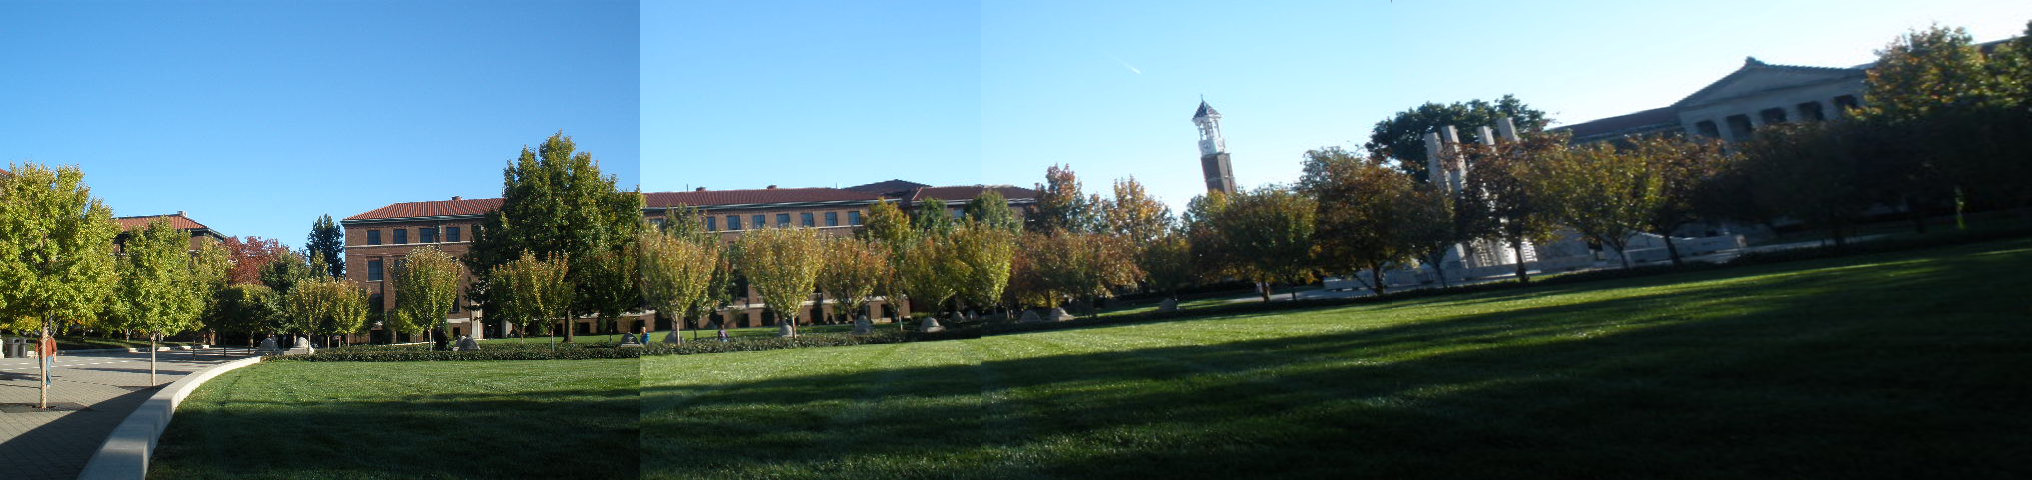

In [ ]:
# Stitching images together
stitched_34 = image_stitcher(image_paths[2], image_paths[3])

# Obtains the black pixel by traversing the first row to crop image in a better way
gray_stitch = cv2.cvtColor(stitched_34, cv2.COLOR_BGR2GRAY)
for i in range(len(gray_stitch[0])):
        min_black_pixels = gray_stitch[0][i]
        if min_black_pixels == 0:
            min_black_pixels = i-1
            break

# To obtain the limits of the photo frame
white_pixels = np.any(stitched_34 != [0, 0, 0], axis= -1)
y_min, x_min = np.min(np.where(white_pixels), axis = 1)
y_max, x_max = np.max(np.where(white_pixels), axis = 1)

# Cropped image till the first black pixel obtained
cropped_image1 = stitched_34[y_min:y_max+1, x_min:min_black_pixels]

# Stitching images together
stitched_234 = image_stitcher(image_paths[1], cropped_image1)

# Obtains the black pixel by traversing the first row to crop image in a better way
gray_stitch = cv2.cvtColor(stitched_234, cv2.COLOR_BGR2GRAY)
for i in range(len(gray_stitch[0])):
        min_black_pixels = gray_stitch[0][i]
        if min_black_pixels == 0:
            min_black_pixels = i-1
            break

# To obtain the limits of the photo frame
white_pixels = np.any(stitched_234 != [0, 0 , 0 ], axis= -1)
y_min, x_min = np.min(np.where(white_pixels), axis = 1)
y_max, x_max = np.max(np.where(white_pixels), axis = 1)

# Cropped image till the first black pixel obtained
cropped_image2 = stitched_234[y_min:y_max+1, x_min:min_black_pixels]

# Stitching all the images together
stiched_1234 = image_stitcher(image_paths[0], cropped_image2)

cv2_imshow(stiched_1234)

cv2.destroyAllWindows()

# Pipeline to stitch 1st and 2nd image along with 3rd and 4th image and then stitch them together

i.e  1 with 2 \
    3 with 4 \
    12 and 34

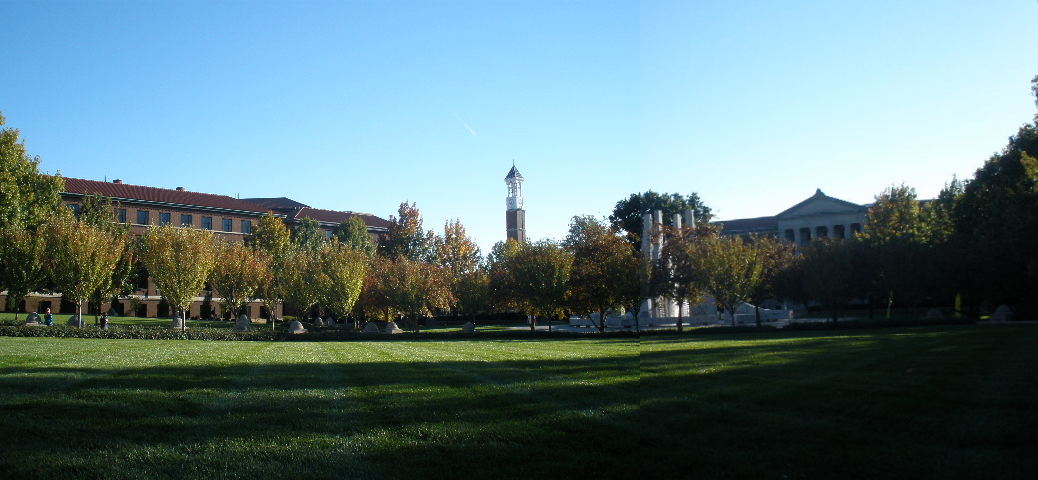

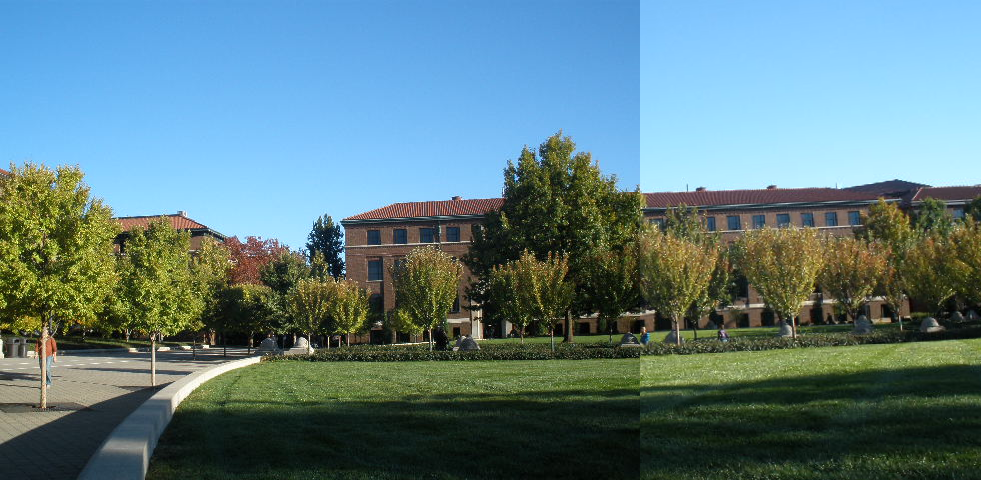

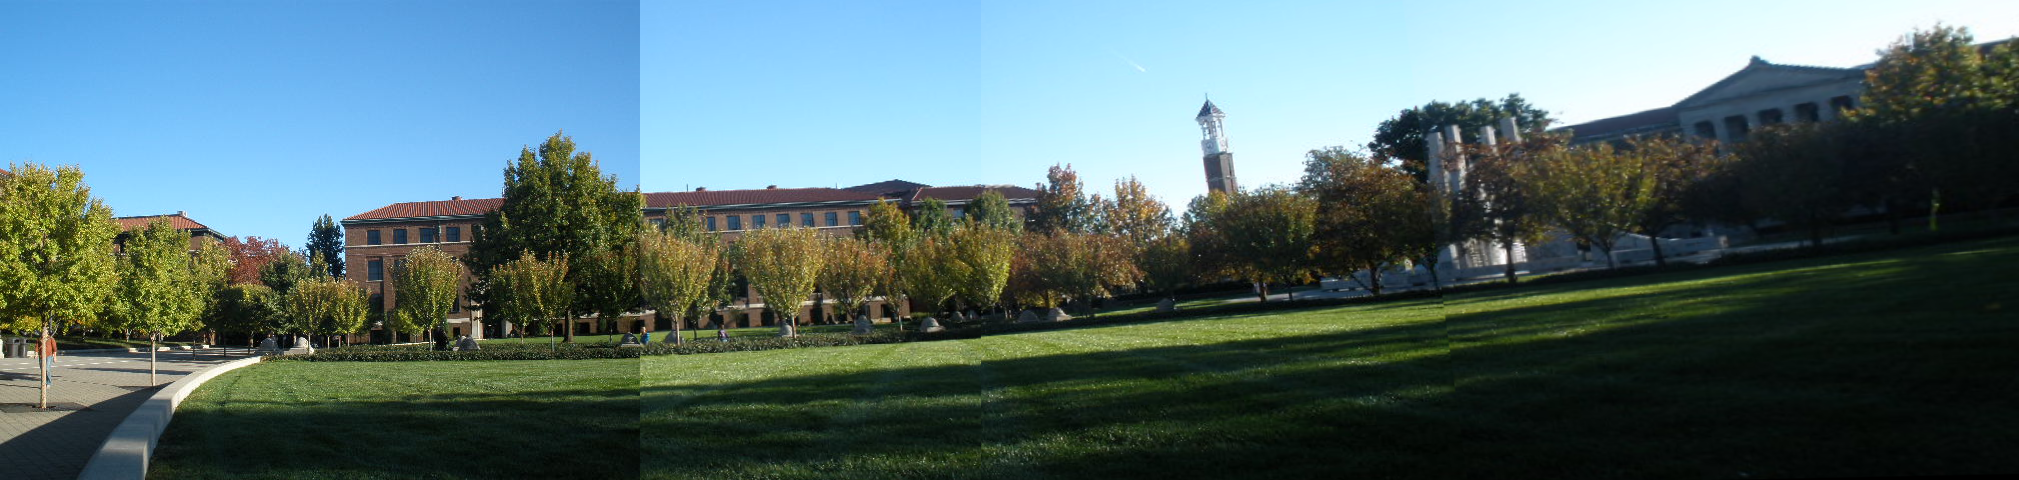

In [ ]:
# Stitching images together
stitched_12 = image_stitcher(image_paths[0], image_paths[1])

# Obtains the black pixel by traversing the first row to crop image in a better way
gray_stitch = cv2.cvtColor(stitched_12, cv2.COLOR_BGR2GRAY)
for i in range(len(gray_stitch[0])):
        min_black_pixels = gray_stitch[0][i]
        if min_black_pixels == 0:
            min_black_pixels = i-1
            break

# To obtain the limits of the photo frame
white_pixels = np.any(stitched_12 != [0, 0, 0], axis= -1)
y_min, x_min = np.min(np.where(white_pixels), axis = 1)
y_max, x_max = np.max(np.where(white_pixels), axis = 1)

# Cropped image till the first black pixel obtained
cropped_image1 = stitched_12[y_min:y_max+1, x_min:min_black_pixels]


# Stitching images together
stitched_34 = image_stitcher(image_paths[2], image_paths[3])

# Obtains the black pixel by traversing the first row to crop image in a better way
gray_stitch = cv2.cvtColor(stitched_34, cv2.COLOR_BGR2GRAY)
for i in range(len(gray_stitch[0])):
        min_black_pixels = gray_stitch[0][i]
        if min_black_pixels == 0:
            min_black_pixels = i-1
            break

# To obtain the limits of the photo frame
white_pixels = np.any(stitched_34 != [0, 0 , 0 ], axis= -1)
y_min, x_min = np.min(np.where(white_pixels), axis = 1)
y_max, x_max = np.max(np.where(white_pixels), axis = 1)

# Cropped image till the first black pixel obtained
cropped_image2 = stitched_34[y_min:y_max+1, x_min:min_black_pixels]

# Stitching all the images together
stitched_1234 = image_stitcher(cropped_image1, cropped_image2)

cv2_imshow(cropped_image1)
cv2_imshow(cropped_image2)
cv2_imshow(stitched_1234)
cv2.destroyAllWindows()

#In general, why does panoramic mosaicing work better when the camera is only allowed to rotate at its camera center?

Panoramic mosaicing works better when the camera is only allowed to rotate at its camera center due to several key reasons:


Centered camera rotation ensures that the perspective and features of the scene remain consistent throughout the rotation for accurate alignment and stitching of the images.

In simpler terms, rotating the camera around the nodal point is like looking around a scene by swiveling your head on your neck. There's minimal change in your viewpoint relative to the scene, making it easier to combine the information you see to form a complete mental picture. If you move your head side-to-side (not rotating at a central point), the perspective shifts more dramatically, making it harder to mentally stitch the scene together.

Thus, calculating homography becomes easy because of minimum perspective changes and dirtortion.